## Surprise Housing
The soultion is divided into following sections:
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

## 1. Data Understanding and Exploration

In [1]:
#importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error


# hide warnings
import warnings
warnings.filterwarnings('ignore')

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
#reading the dataset

house = pd.read_csv(r"D:\Ashima\PGDML\ML-2\Assignment-Advanced Regression\train.csv")

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#checking rows and columns in dataset

house.shape

(1460, 81)

In [5]:
#checking all the features for null values

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Numerical Variables

In [6]:
nf = (house.dtypes != 'object')
numerical_features= list(nf[nf].index)
print(numerical_features)
print('Length of Numerical features is:', len(numerical_features))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Length of Numerical features is: 38


#### DateTime variables

In [7]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

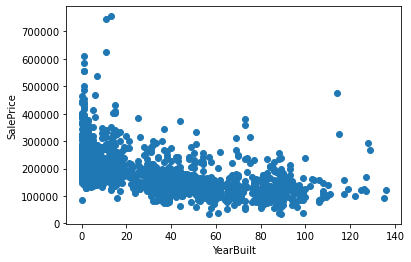

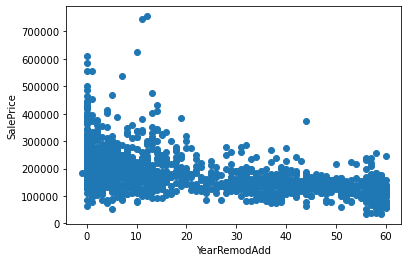

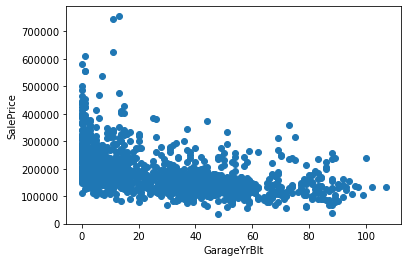

In [8]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=house.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

#### Categorical Features

In [9]:
cf = (house.dtypes == 'object')
categorical_features = list(cf[cf].index)
print(len(categorical_features))

43


### Working on missing values

In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# checking columns of object dataype with null values

house.select_dtypes('object').isnull().sum()>1

MSZoning         False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
PoolQC            True
Fence             True
MiscFeature       True
SaleType         False
SaleCondition    False
dtype: bool

In [12]:
# replacing null values with a new label as it does not represent random NA's

house['Alley'] = house['Alley'].replace(np.nan, 'No Alley')
house['MasVnrType'] = house['MasVnrType'].replace(np.nan, 'No Masonry')
house['BsmtQual'] = house['BsmtQual'].replace(np.nan, 'No Basement')
house['BsmtCond'] = house['BsmtCond'].replace(np.nan, 'No Basement')
house['BsmtExposure'] = house['BsmtExposure'].replace(np.nan, 'No Basement')
house['BsmtFinType1'] = house['BsmtFinType1'].replace(np.nan, 'No Basement')
house['BsmtFinType2'] = house['BsmtFinType2'].replace(np.nan, 'No Basement')
house['FireplaceQu'] = house['FireplaceQu'].replace(np.nan, 'No Fireplace')
house['GarageType'] = house['GarageType'].replace(np.nan, 'No garage')
house['GarageFinish'] = house['GarageFinish'].replace(np.nan, 'No garage')
house['GarageQual'] = house['GarageQual'].replace(np.nan, 'No garage')
house['GarageCond'] = house['GarageCond'].replace(np.nan, 'No garage')
house['PoolQC'] = house['PoolQC'].replace(np.nan, 'No Pool')
house['Fence'] = house['Fence'].replace(np.nan, 'No Fence')

In [13]:
# checking columns again after filling missing values

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
house['BsmtFinType1'].isnull().sum()

0

In [15]:
# checking for other features like MiscFeature, GarageYrBlt, MasvnrArea
# imputing the features with median value as there are outliers

median_value1 = house['LotFrontage'].median()
print(median_value1)
house['LotFrontage'].fillna(value=median_value1, inplace=True)
house['LotFrontage']

69.0


0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [16]:
# MasvnrArea
# GarageYrBlt
median_value2 = house['MasVnrArea'].median()
print(median_value2)
house['MasVnrArea'].fillna(value=median_value2, inplace=True)
house['MasVnrArea']

median_value3 = house['GarageYrBlt'].median()
print(median_value3)
house['GarageYrBlt'].fillna(value=median_value3, inplace=True)
house['GarageYrBlt']

0.0
1980.0


0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [17]:
print(house['LotFrontage'].isnull().sum())
print(house['MasVnrArea'].isnull().sum())
print(house['GarageYrBlt'].isnull().sum())

0
0
0


In [18]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
house.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,No Fireplace,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,No Pool,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,No Pool,No Fence,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,69.0,10382,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,No Pool,No Fence,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,No Pool,No Fence,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,No Alley,Reg,Lvl,AllPub,Co

In [20]:
# Removing null values of Electrical feature

house = house[house['Electrical'].notnull()]

In [21]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [22]:
# dropping id column as it is not useful for analysis part
# dropping MiscFeature as it has less than 5% of non null values

house = house.drop(['Id', 'MiscFeature'], axis=1)

In [23]:
house.shape

(1459, 79)

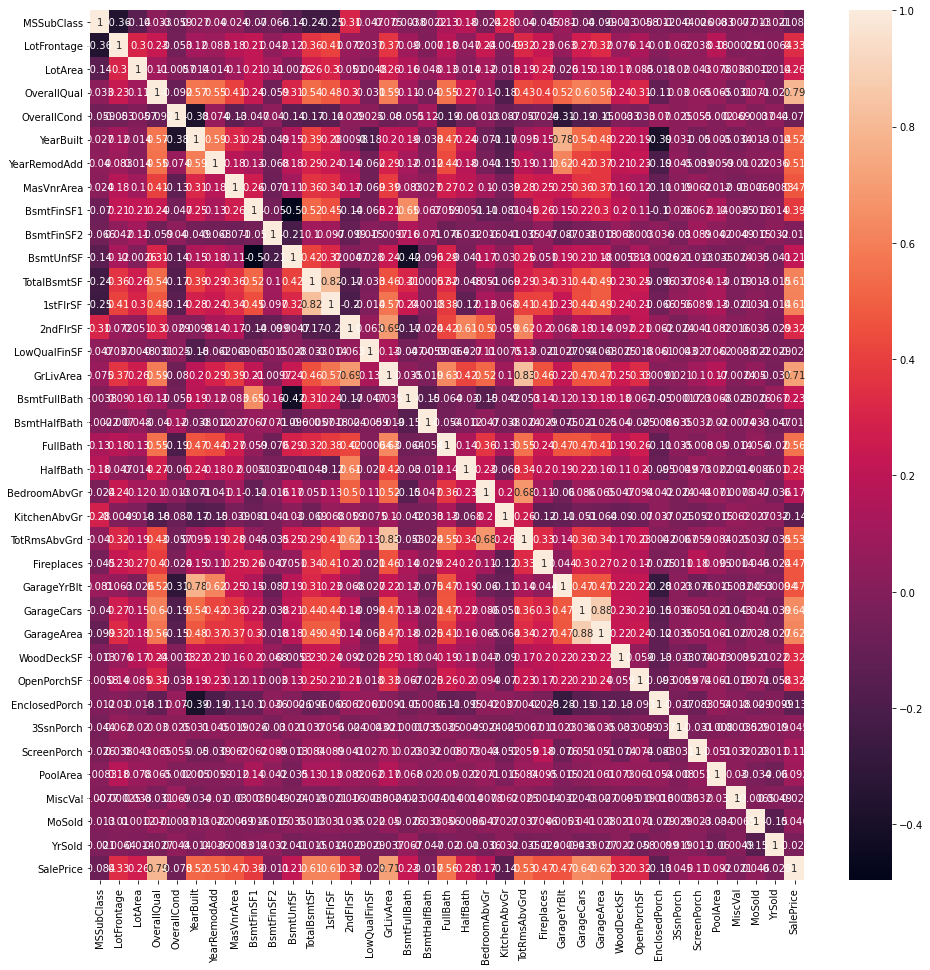

In [24]:
# correlation matrix

plt.figure(figsize=(16,16))
sns.heatmap(house[list(house.dtypes[house.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [25]:
house['FireplaceQu'].value_counts()

No Fireplace    689
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

#### Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

In [26]:
house['LandSlope'] = house.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house['ExterQual'] = house.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['BsmtQual'] = house.BsmtQual.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['BsmtCond'] = house.BsmtCond.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['BsmtExposure'] = house.BsmtExposure.map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house['BsmtFinType1'] = house.BsmtFinType1.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house['BsmtFinType2'] = house.BsmtFinType2.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house['HeatingQC'] = house.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['CentralAir'] = house.CentralAir.map({'N':0,'Y':1})
house['KitchenQual'] = house.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['GarageFinish'] = house.GarageFinish.map({'No garage':0,'Unf':1,'RFn':2,'Fin':3})
house['GarageQual'] = house.GarageQual.map({'No garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['GarageCond'] = house.GarageCond.map({'No garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['ExterCond'] = house.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['LotShape'] = house.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
house['FireplaceQu'] = house.FireplaceQu.map({'No Fireplace':0,'Po':1,'Fa':2,'TA':3, 'Gd':4, 'Ex': 5})
house['PoolQC'] = house.PoolQC.map({'No Pool':0,'Fa':1,'TA':2,'Gd':3, 'Ex':4})
house['Fence'] = house.Fence.map({'No Fence':0,'MnWw':1,'GdWo':2,'MnPrv':3, 'GdPrv':4})

In [27]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley,3,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,3,8,Typ,0,0,Attchd,2003.0,2,2,548,3,3,Y,0,61,0,0,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No Alley,3,Lvl,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,GasA,4,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,Typ,1,3,Attchd,1976.0,2,2,460,3,3,Y,298,0,0,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No Alley,0,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,GasA,4,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,3,6,Typ,1,3,Attchd,2001.0,2,2,608,3,3,Y,0,42,0,0,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No Alley,0,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216,1,0,540,756,GasA,3,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,3,7,Typ,1,4,Detchd,1998.0,1,3,642,3,3,Y,0,35,272,0,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No Alley,0,Lvl,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,GasA,4,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,3,9,Typ,1,3,Attchd,2000.0,2,3,836,3,3,Y,192,84,0,0,0,0,0,0,0,12,2008,WD,Normal,250000


In [28]:
house['BsmtFinType1'].value_counts()

1    429
6    418
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1, dtype: int64

In [29]:
house.isnull().sum().any()

False

#### We can see numerciacl features are skewed so we can perform log transformation.

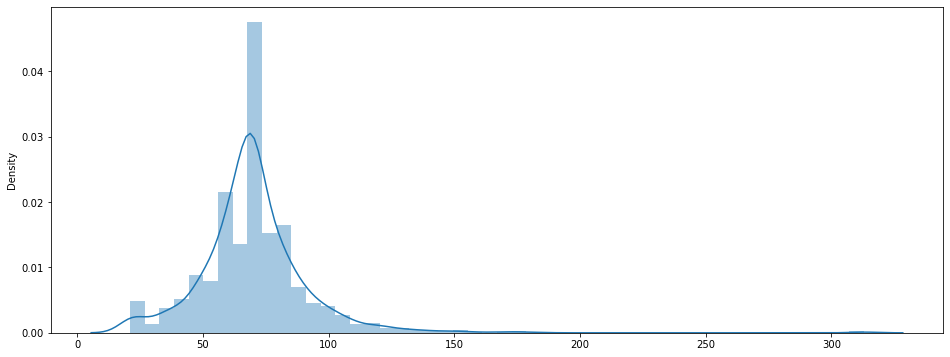

In [30]:
num_features=house[['LotFrontage']]
plt.figure(figsize=(16,6))
sns.distplot(num_features)
plt.show()

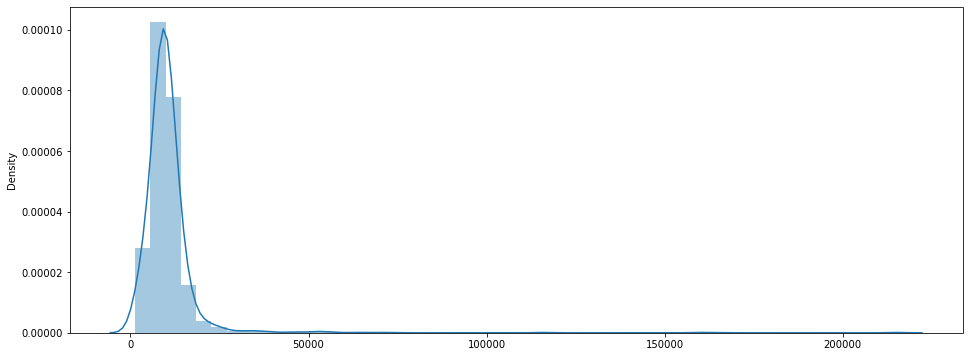

In [31]:
num_features=house[['LotArea']]
plt.figure(figsize=(16,6))
sns.distplot(num_features)
plt.show()

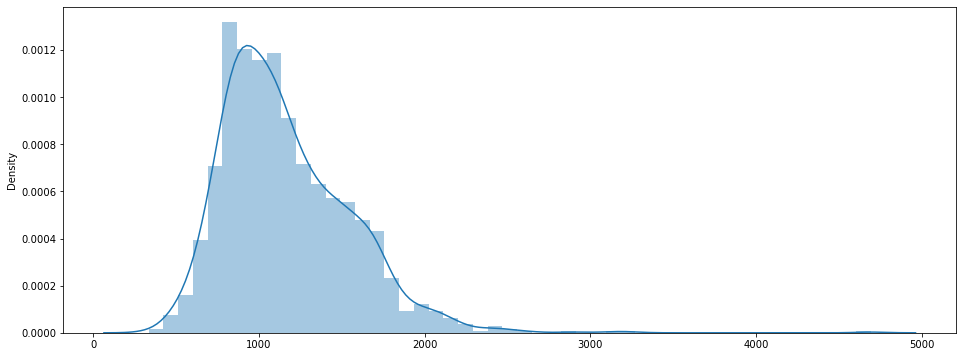

In [32]:
num_features=house[['1stFlrSF']]
plt.figure(figsize=(16,6))
sns.distplot(num_features)
plt.show()

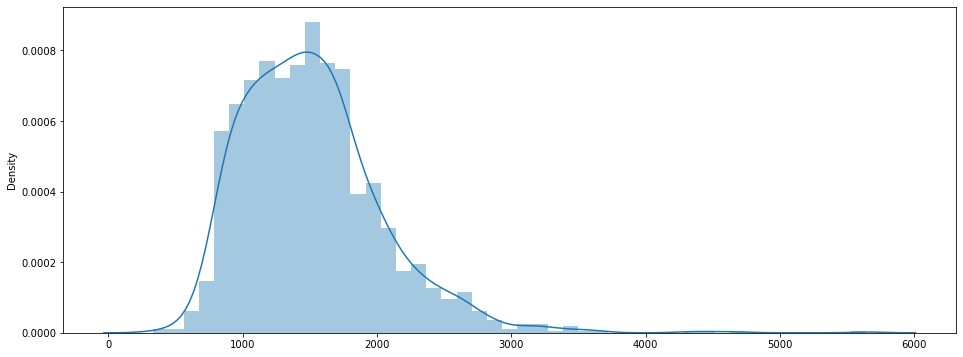

In [33]:
num_features=house[['GrLivArea']]
plt.figure(figsize=(16,6))
sns.distplot(num_features)
plt.show()

In [34]:
# performing log transformation on numercical variables
# except target variable (SalePrice) as it should be done only on train data
# This can be done once partitioning of data is done.

num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    house[feature]=np.log(house[feature])

In [35]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,No Alley,3,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,1,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,3,8,Typ,0,0,Attchd,2003.0,2,2,548,3,3,Y,0,61,0,0,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,4.382027,9.169518,Pave,No Alley,3,Lvl,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,GasA,4,1,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,2,6,Typ,1,3,Attchd,1976.0,2,2,460,3,3,Y,298,0,0,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,4.219508,9.328123,Pave,No Alley,0,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,GasA,4,1,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,3,6,Typ,1,3,Attchd,2001.0,2,2,608,3,3,Y,0,42,0,0,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,4.094345,9.164296,Pave,No Alley,0,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216,1,0,540,756,GasA,3,1,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,3,7,Typ,1,4,Detchd,1998.0,1,3,642,3,3,Y,0,35,272,0,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,4.430817,9.565214,Pave,No Alley,0,Lvl,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,GasA,4,1,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,3,9,Typ,1,3,Attchd,2000.0,2,3,836,3,3,Y,192,84,0,0,0,0,0,0,0,12,2008,WD,Normal,250000


In [36]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    house[feature]=house['YrSold']-house[feature]

In [37]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,No Alley,3,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,1,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,3,8,Typ,0,0,Attchd,5.0,2,2,548,3,3,Y,0,61,0,0,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,4.382027,9.169518,Pave,No Alley,3,Lvl,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,GasA,4,1,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,2,6,Typ,1,3,Attchd,31.0,2,2,460,3,3,Y,298,0,0,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,4.219508,9.328123,Pave,No Alley,0,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,GasA,4,1,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,3,6,Typ,1,3,Attchd,7.0,2,2,608,3,3,Y,0,42,0,0,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,4.094345,9.164296,Pave,No Alley,0,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216,1,0,540,756,GasA,3,1,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,3,7,Typ,1,4,Detchd,8.0,1,3,642,3,3,Y,0,35,272,0,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,4.430817,9.565214,Pave,No Alley,0,Lvl,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,GasA,4,1,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,3,9,Typ,1,3,Attchd,8.0,2,3,836,3,3,Y,192,84,0,0,0,0,0,0,0,12,2008,WD,Normal,250000


In [38]:
categorical_feats=[feature for feature in house.columns if house[feature].dtype=='O']

In [39]:
categorical_feats

['MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

### Creating dummy varibales

In [40]:
dummy_col = pd.get_dummies(house[['MSZoning','Street','Alley','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']], drop_first=True)

house = pd.concat([house, dummy_col], axis=1)

In [41]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Masonry,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,4.174387,9.041922,Pave,No Alley,3,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,1,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,3,8,Typ,0,0,Attchd,5.0,2,2,548,3,3,Y,0,61,0,0,0,0,0,0,0,2,2008,WD,Normal,208500,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [42]:
house = house.drop(['MSZoning','Street','Alley','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis=1)

In [43]:
house.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Masonry,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,4.174387,9.041922,3,0,7,5,5,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,6.752270,854,0,7.444249,1,0,2,1,3,1,3,8,0,0,5.0,2,2,548,3,3,0,61,0,0,0,0,0,0,0,2,2008,208500,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,4.382027,9.169518,3,0,6,8,31,31,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,7.140453,0,0,7.140453,0,1,2,0,3,1,2,6,1,3,31.0,2,2,460,3,3,298,0,0,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,

In [44]:
house.shape

(1459, 206)

### Let's check the distribution of SalePrice (dependent variable)

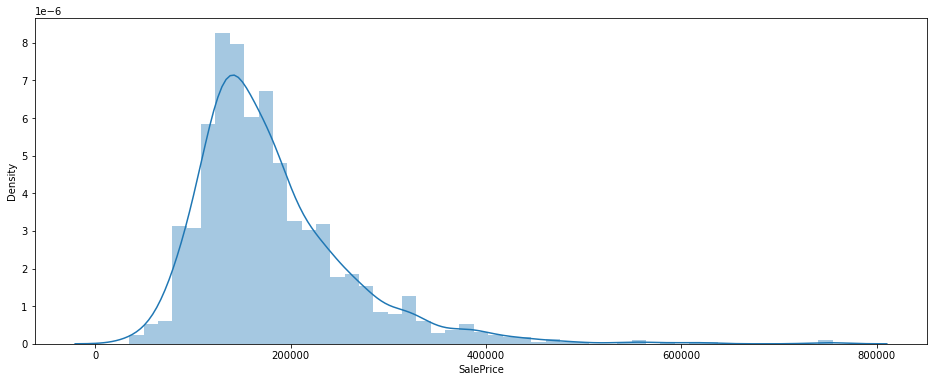

In [45]:
plt.figure(figsize=(16,6))
sns.distplot(house.SalePrice)
plt.show()

## Outliers Removal

In [46]:
num_cols = list(house.dtypes[house.dtypes !='object'].index)
num_cols = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_cols:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house = drop_outliers(house)

# Creating train and test dataset

### Feature Scaling 

In [47]:
df_train,df_test = train_test_split(house,train_size=0.7,test_size=0.3,random_state=100)

In [48]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Masonry,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
160,20,4.234107,9.316501,0,0,6,6,24,24,0.0,2,2,4,3,1,4,660,1,0,572,1232,2,1,7.116394,0,0,7.116394,0,0,2,0,3,1,2,6,0,0,24.0,1,2,516,3,3,0,0,0,0,0,0,0,0,0,6,2008,162500,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
455,20,4.382027,9.169518,3,0,7,6,34,34,320.0,2,2,3,3,1,5,916,1,0,326,1242,1,1,7.124478,0,0,7.124478,0,0,1,1,3,1,2,6,1,3,34.0,1,2,528,3,3,0,0,0,0,0,0,0,0,0,9,2007,175500,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [49]:
list1 = list(house.select_dtypes(include =['float64']))

print(list1,end="")

['LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', 'GrLivArea', 'GarageYrBlt']

In [50]:
list2 = list(house.select_dtypes(include =['int64']))
print(list2, end="")

['MSSubClass', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [51]:
# Scaling on numerical variables except target variable (SalePrice)
num_col = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinType1', '1stFlrSF', 'GrLivArea', 'GarageYrBlt', 'PoolQC','MSSubClass', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

scaler = RobustScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

### Log Transform of Target variable - SalePrice

In [52]:
#df_train.SalePrice = np.log(df_train.SalePrice)
#df_test.SalePrice = np.log(df_test.SalePrice)

In [53]:
#print(df_train['SalePrice'].head())
#print(df_test['SalePrice'].head())

In [54]:
y_train=df_train.pop('SalePrice')
X_train=df_train

In [55]:
y_test=df_test.pop('SalePrice')
X_test=df_test

# Model Building and Evaluation

### Linear Regression

In [56]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-1.449699947653346
[ 4.36281559e-03  1.86433012e-02  1.04512618e-01  3.86229362e-02
  2.43105069e-02  2.17139915e-01  6.40873694e-02 -1.37237960e-01
 -3.31041191e-02  3.68429403e-02  3.74360627e-02 -5.74615617e-02
  2.72724685e-02 -7.00435781e-02  6.10300664e-02  4.44953097e-02
  1.41366161e-01 -5.03092521e-03  1.37353419e-04 -1.00122665e-03
  2.03930979e-01  1.42414464e-02  3.22061440e-02  3.38474143e-01
  6.57914348e-01  1.00687465e-03 -2.41977126e-01  2.24201764e-02
 -3.60177054e-02  3.54709913e-02  5.42391611e-02 -7.49549321e-02
 -1.91751760e-01  7.63672622e-02  8.02538983e-02  4.21306940e-02
 -3.83580920e-02  1.06339470e-02  1.17473044e-02  6.32369633e-02
  5.03331737e-02  1.02861434e-01 -5.77874989e-02  2.38176847e-02
  2.01880115e-02 -3.80252116e-05  6.79472218e-04  4.87437316e-04
  4.12170298e-15 -3.33066907e-16 -1.18018838e-02  6.25462529e-05
 -1.74514001e-02 -1.14835889e-03  3.87996963e-01  4.44656371e-01
  2.88761710e-01  2.85451177e-01  2.95096386e-01  1.74597976e-02
  1.39

In [58]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R Square on train data:', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R Square on test data:',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Residual Sum of Squares on train data:', rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Residual Sum of Squares on test data:', rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mean Square Error om train data:', mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mean Square Error om test data:',mse_test_lr)
metric.append(mse_test_lr**0.5)

R Square on train data: 0.9349207519409887
R Square on test data: 0.8375774333422658
Residual Sum of Squares on train data: 54.434495278791545
Residual Sum of Squares on test data: 73.60531043039596
Mean Square Error om train data: 0.05389553987999163
Mean Square Error om test data: 0.16959748947095843


## Ridge Regression

In [59]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.00001, 0.0001, 0.001, 0.005, 0.0005,0.0015, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.0005, 0.0015,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007936,0.004942,0.003124,0.006248,0.00001,{'alpha': 1e-05},-0.222733,-0.205419,-0.223418,-0.248262,-0.223460,-0.224658,0.013667,30,-0.160292,-0.164547,-0.162082,-0.155879,-0.155307,-0.159622,0.003560
1,0.003124,0.006249,0.000000,0.000000,0.00010,{'alpha': 0.0001},-0.222724,-0.205417,-0.223406,-0.248256,-0.223451,-0.224651,0.013666,29,-0.160293,-0.164548,-0.162083,-0.155880,-0.155307,-0.159622,0.003561
2,0.006249,0.007653,0.003124,0.006248,0.00100,{'alpha': 0.001},-0.222640,-0.205400,-0.223286,-0.248191,-0.223368,-0.224577,0.013655,27,-0.160305,-0.164556,-0.162097,-0.155889,-0.155310,-0.159631,0.003563
3,0.005079,0.006489,0.004753,0.006283,0.00500,{'alpha': 0.005},-0.222285,-0.205323,-0.222773,-0.247909,-0.223035,-0.224265,0.013605,25,-0.160361,-0.164592,-0.162154,-0.155932,-0.155336,-0.159675,0.003568
4,0.009373,0.007653,0.000000,0.000000,0.00050,{'alpha': 0.0005},-0.222687,-0.205410,-0.223352,-0.248227,-0.223414,-0.224618,0.013661,28,-0.160298,-0.164552,-0.162089,-0.155884,-0.155309,-0.159626,0.003562


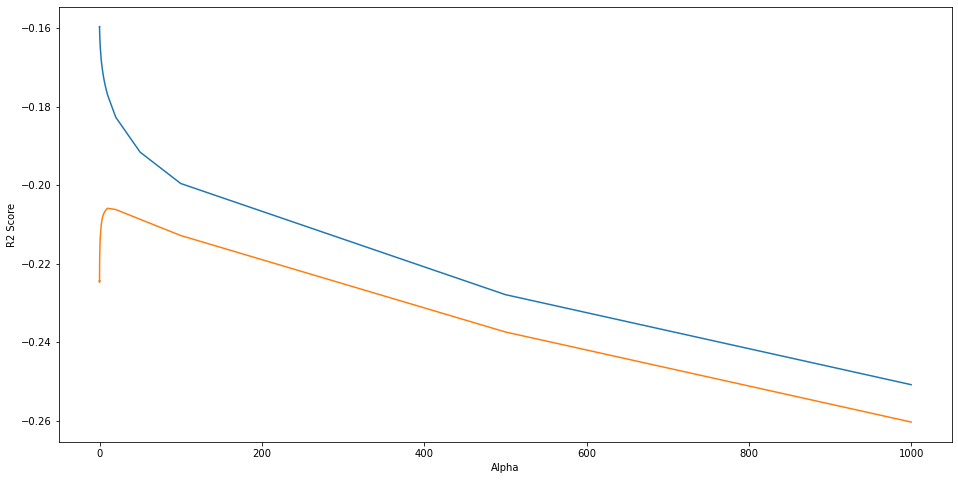

In [61]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [62]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [63]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-4.63611309e-02  1.13816540e-02  8.39836973e-02  1.99724122e-02
 -1.98055359e-02  2.46489289e-01  6.76367804e-02 -8.96553713e-02
 -2.21425538e-02  5.10777186e-02  7.74594632e-02 -3.98256124e-02
  2.75074004e-02 -9.51361852e-02  6.43873757e-02  5.81416849e-02
  1.26788687e-01 -2.34151437e-03  1.13457983e-04 -9.98423665e-03
  1.71854574e-01  6.85291186e-04  1.03482781e-02  1.71191909e-01
  3.27673000e-01  5.29616418e-04  7.75662154e-03  2.58850700e-02
 -5.02267773e-02  5.80833859e-02  7.08247045e-02 -7.70233100e-02
 -1.40484613e-01  7.15754213e-02  9.38214833e-02  3.53106618e-02
 -1.02092168e-02 -1.03645242e-02  3.24448142e-03  5.42341069e-02
  4.47013138e-02  6.12967738e-02 -6.07602591e-02  2.93609528e-02
  2.18198726e-02 -1.20634356e-05  2.72081498e-04  4.48539855e-04
  0.00000000e+00  0.00000000e+00 -7.56019742e-03  1.52422211e-05
 -1.13364560e-02 -1.00152143e-02  3.35494185e-02  4.12164944e-02
  2.01218921e-02 -2.40877923e-03  7.70409027e-02  1.17478088e-02
  6.64181448e-02  5.14597

In [64]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R square on train data:', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R square on test data:', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Residual Sum of Squares on train data:', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Residual Sum of Squares on test data:',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mean Square Error on train data:',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mean Square Error on test data:',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R square on train data: 0.9237947262157996
R square on test data: 0.8388779162923943
Residual Sum of Squares on train data: 63.740681396067274
Residual Sum of Squares on test data: 73.01596836282873
Mean Square Error on train data: 0.06310958554066066
Mean Square Error on test data: 0.16823955843969754


## Lasso Regression

In [65]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.0005, 0.0015,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.083393,0.009513,0.006325,0.005867,0.00001,{'alpha': 1e-05},-0.220540,-0.205833,-0.221316,-0.245654,-0.221098,-0.222888,0.012809,6,-0.160592,-0.164780,-0.162325,-0.156098,-0.155674,-0.159894,0.003535
1,0.070295,0.016355,0.001600,0.003200,0.00010,{'alpha': 0.0001},-0.210797,-0.206100,-0.211773,-0.236097,-0.216465,-0.216246,0.010457,5,-0.163300,-0.167121,-0.164591,-0.159033,-0.157350,-0.162279,0.003596
2,0.015293,0.001234,0.000000,0.000000,0.00100,{'alpha': 0.001},-0.189937,-0.193253,-0.200818,-0.223545,-0.210217,-0.203554,0.012191,1,-0.180535,-0.180477,-0.179025,-0.174386,-0.171391,-0.177163,0.003656
3,0.015622,0.000002,0.000000,0.000000,0.00500,{'alpha': 0.005},-0.200750,-0.218301,-0.201443,-0.231008,-0.224415,-0.215183,0.012186,4,-0.200636,-0.202393,-0.198827,-0.198385,-0.196420,-0.199332,0.002035
4,0.018833,0.003962,0.009367,0.007648,0.00050,{'alpha': 0.0005},-0.196377,-0.195939,-0.200408,-0.227164,-0.210801,-0.206138,0.011798,3,-0.173233,-0.174160,-0.173150,-0.168769,-0.166160,-0.171094,0.003097


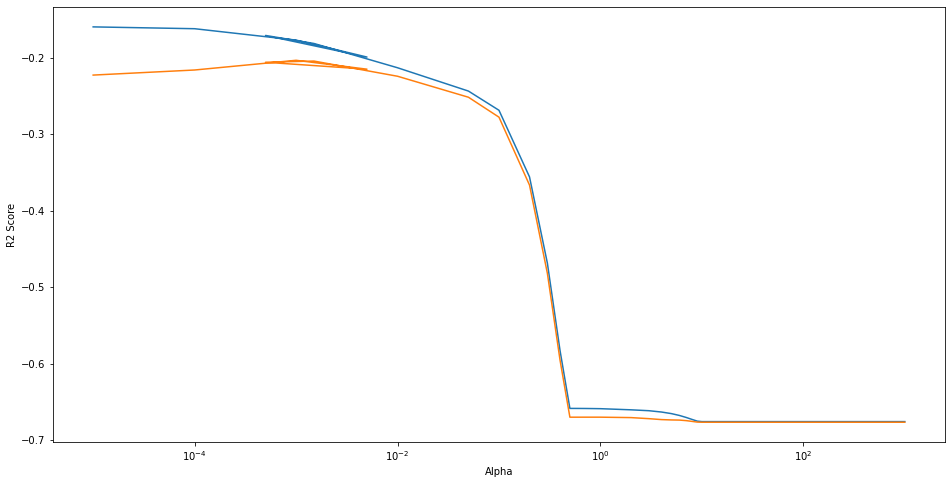

In [67]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [68]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [69]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [70]:
lasso.coef_

array([-5.00661758e-02,  8.80208564e-03,  7.27585736e-02,  1.92983312e-02,
       -0.00000000e+00,  2.51984017e-01,  6.73249014e-02, -1.20808295e-01,
       -2.24682362e-02,  4.42711881e-02,  6.58830729e-02, -3.04035649e-02,
        1.51718071e-02, -8.64870436e-02,  6.19823076e-02,  5.16147044e-02,
        1.48013206e-01, -0.00000000e+00,  1.36650155e-04, -0.00000000e+00,
        1.70196038e-01, -0.00000000e+00,  0.00000000e+00,  2.36396126e-01,
        4.37050107e-01,  5.59761405e-04, -6.38667698e-02,  1.52789911e-02,
       -4.02829756e-02,  4.96444817e-02,  6.07695290e-02, -7.93672837e-02,
       -1.62986705e-01,  6.81998558e-02,  9.01885146e-02,  2.55564839e-02,
       -0.00000000e+00, -7.94526544e-03,  2.85398662e-03,  5.43667006e-02,
        4.13563277e-02,  2.39981493e-02, -3.22222823e-02,  2.48036496e-02,
        1.97533149e-02, -2.12024658e-05,  1.86011502e-04,  4.08506110e-04,
        0.00000000e+00,  0.00000000e+00, -6.67320906e-03,  1.67290406e-05,
       -1.15117255e-02, -

In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R square on train data:', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R square on test data:',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Residual Sum of Squares on train data:', rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Residual Sum of Squares on test data:', rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mean Square Error on train data:', mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mean Square Error on test data:',mse_test_lr)
metric3.append(mse_test_lr**0.5)

R square on train data: 0.923022714909037
R square on test data: 0.842657510111447
Residual Sum of Squares on train data: 64.38641789558923
Residual Sum of Squares on test data: 71.30316341166443
Mean Square Error on train data: 0.06374892860949428
Mean Square Error on test data: 0.164293003252683


In [72]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.934921,0.923795,0.923023
1,R2 Score (Test),0.837577,0.838878,0.842658
2,RSS (Train),54.434495,63.740681,64.386418
3,RSS (Test),73.605310,73.015968,71.303163
4,MSE (Train),0.232154,0.251216,0.252486
5,MSE (Test),0.411822,0.410170,0.405331


## Lets observe the changes in the coefficients after regularization

In [73]:
betas = pd.DataFrame(index=df_train.columns)

In [74]:
betas.rows = df_train.columns

In [75]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [77]:
pd.set_option('display.max_rows', None)
betas.head(205)

,Linear,Ridge,Lasso
MSSubClass,4.362816e-03,-0.046361,-0.050066
LotFrontage,1.864330e-02,0.011382,0.008802
LotArea,1.045126e-01,0.083984,0.072759
LotShape,3.862294e-02,0.019972,0.019298
LandSlope,2.431051e-02,-0.019806,-0.000000
OverallQual,2.171399e-01,0.246489,0.251984
OverallCond,6.408737e-02,0.067637,0.067325
YearBuilt,-1.372380e-01,-0.089655,-0.120808
YearRemodAdd,-3.310412e-02,-0.022143,-0.022468
MasVnrArea,3.684294e-02,0.051078,0.044271
